In [24]:
import csv
import networkx as net
import matplotlib.pyplot as plt
%matplotlib inline

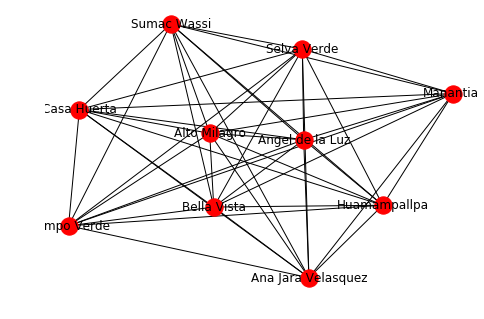

In [27]:
Grafo = net.Graph()

#Funcion para leer Archivo csv
def CargarCSV(fileName):
    Dictionary = {}
    with open(fileName, encoding = 'ISO-8859-1') as db:
        BdFile = csv.reader(db, delimiter = ',')
        
        id_elemento = -1 #Para que no cuente la primera fila
        
        for r in BdFile:
            if id_elemento != -1:
                dato = {}
                dato["nombre"] = r[5]
                dato["x_c"] = float(r[15])
                dato["y_c"] = float(r[16])
                Dictionary[id_elemento] = dato
                del dato #reinicia dato
            id_elemento += 1 
    return Dictionary

#Calcula Distancias
def Distances(x1, x2, y1, y2):
    peso = ((x1-x2)**2 + (y1-y2)**2)**(1/2)
    return peso


def DistancesDictionary(fileName):
    db_Cp = CargarCSV(fileName)
    for i in db_Cp:
        temp = {} #Peso
        for j in db_Cp:
            temp[j] = Distances(float(db_Cp[i]["x_c"]),float(db_Cp[j]["x_c"]), float(db_Cp[i]["y_c"]), float(db_Cp[j]["y_c"]))
            Grafo.add_weighted_edges_from([(db_Cp[j]['nombre'], db_Cp[i]['nombre'], temp[j])]) #Se carga en el grafo para visualizar

DistancesDictionary('Grafo_Testeo1.csv')

net.draw(Grafo, with_labels = True)
plt.draw()
plt.show()     